In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 200)

In [3]:
df = pd.read_csv("csv/Carlsen_game_info.csv")

df.head()

,game_id,game_order,event,site,date_played,round,white,black,result,white_elo,black_elo,winner,winner_elo,loser,loser_elo,winner_loser_elo_diff,eco
0,0a17b497-1f25-42ea-969f-60b853ed08a2,1,Troll Masters,Gausdal NOR,2001.01.05,1,"Edvardsen,R","Carlsen,Magnus",1/2-1/2,2055.0,NaN,draw,NaN,draw,NaN,0,D12
1,ad1f96c7-2b08-4bcf-b46a-9fa1778dedb6,2,Troll Masters,Gausdal NOR,2001.01.06,2,"Carlsen,Magnus","Brameld,A",0-1,NaN,2095.0,"Brameld,A",2095.0,"Carlsen,Magnus",NaN,0,B05
2,1a7ded26-f3e8-4ce6-b5fe-0c839a9e0589,3,Troll Masters,Gausdal NOR,2001.01.07,3,"Carlsen,Magnus","Fant,G",1-0,NaN,2062.0,"Carlsen,Magnus",NaN,"Fant,G",2062.0,0,C16
3,62927ed4-e92a-4bb1-b6bb-bf5cfb675993,4,Troll Masters,Gausdal NOR,2001.01.08,4,"Tallaksen,G","Carlsen,Magnus",1/2-1/2,2258.0,NaN,draw,NaN,draw,NaN,0,D35
4,c0dfabf3-7202-486c-9037-46a722032191,5,Troll Masters,Gausdal NOR,2001.01.08,5,"Carlsen,Magnus","Nilssen,J",0-1,NaN,2371.0,"Nilssen,J",2371.0,"Carlsen,Magnus",NaN,0,B32


In [4]:
print(f"Dimensions du dataset: {df.shape}.")

Dimensions du dataset: (4314, 17).


In [5]:
print("Structure du dataset :\n")

df.info()

Structure du dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                4314 non-null   object 
 1   game_order             4314 non-null   int64  
 2   event                  4314 non-null   object 
 3   site                   4314 non-null   object 
 4   date_played            4314 non-null   object 
 5   round                  4314 non-null   object 
 6   white                  4314 non-null   object 
 7   black                  4314 non-null   object 
 8   result                 4314 non-null   object 
 9   white_elo              4293 non-null   float64
 10  black_elo              4280 non-null   float64
 11  winner                 4314 non-null   object 
 12  winner_elo             2671 non-null   float64
 13  loser                  4314 non-null   object 
 14  loser_elo              2638 non-

In [6]:
# Suppression des colonnes game_id et site

df = df.drop(columns=["game_id", "site"])

In [7]:
df = df.dropna(subset = ["white_elo"])
df = df.dropna(subset = ["black_elo"])

print(f"Dimensions du dataset: {df.shape}.")

Dimensions du dataset: (4259, 15).


In [8]:
# Traitement des valeurs NaN et nettoyage

df.loc[(df.winner == "draw"), ["winner_elo", "loser_elo"]]                     = -1

df.loc[(df.winner_loser_elo_diff < 0), "winner_loser_elo_diff"]                = np.abs(df.winner_loser_elo_diff)
df.winner_loser_elo_diff                                                       = np.abs(df.white_elo - df.black_elo)

df.loc[(df.winner_elo.isna()) & (df.winner_loser_elo_diff == 0), "winner_elo"] = df.white_elo
df.loc[(df.loser_elo.isna()) & (df.winner_loser_elo_diff == 0), "loser_elo"]   = df.white_elo

In [9]:
df[["white_elo", "black_elo", "winner",	"winner_elo", "loser", "loser_elo", "winner_loser_elo_diff"]].isna().sum(axis = 0)

white_elo                0
black_elo                0
winner                   0
winner_elo               0
loser                    0
loser_elo                0
winner_loser_elo_diff    0
dtype: int64

In [10]:
nb_games  = df.result.count()
nb_wins   = df.winner.str.contains("Carlsen").sum()
nb_draws  = df.winner.str.contains("draw").sum()
nb_losses = df[~df.winner.str.contains("Carlsen|draw")].winner.count()

print(f"Nombre de tournois                  : {len(df.event.unique())}.")
print(f"Nombre de parties jouées par Magnus : {nb_games}.")
print(f"Nombre de victoires                 : {nb_wins}.")
print(f"Nombre de parties nulles            : {nb_draws}.")
print(f"Nombre de défaites                  : {nb_losses}.")

Nombre de tournois                  : 338.
Nombre de parties jouées par Magnus : 4259.
Nombre de victoires                 : 1939.
Nombre de parties nulles            : 1628.
Nombre de défaites                  : 692.


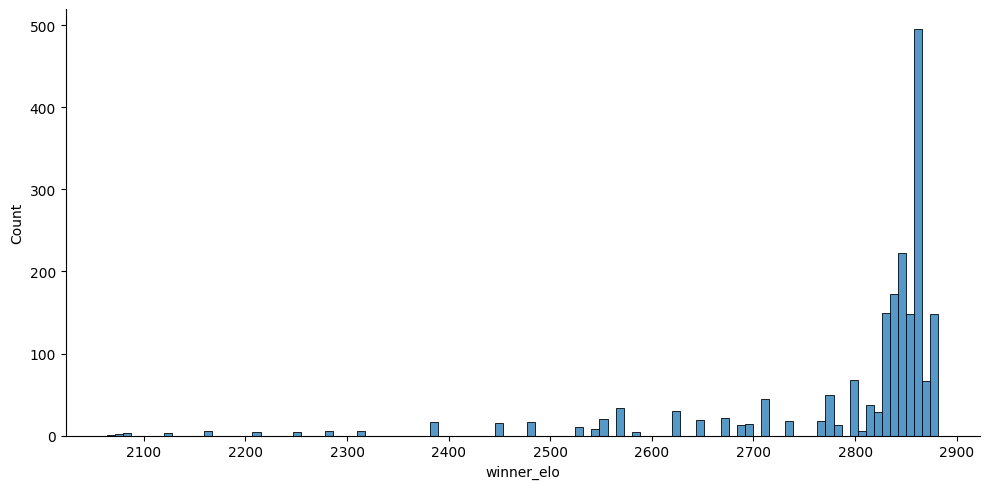

In [11]:
sns.displot(df[df.winner.str.contains("Carlsen")].winner_elo, height = 5, aspect = 2)

plt.show()

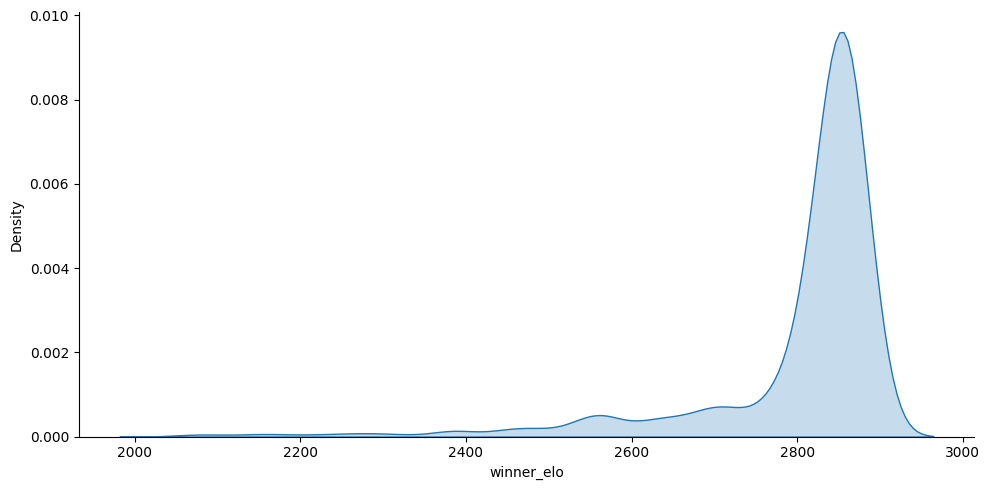

In [12]:
sns.displot(df[df.winner.str.contains("Carlsen")].winner_elo, kind = "kde", fill = True, height = 5, aspect = 2)

plt.show()

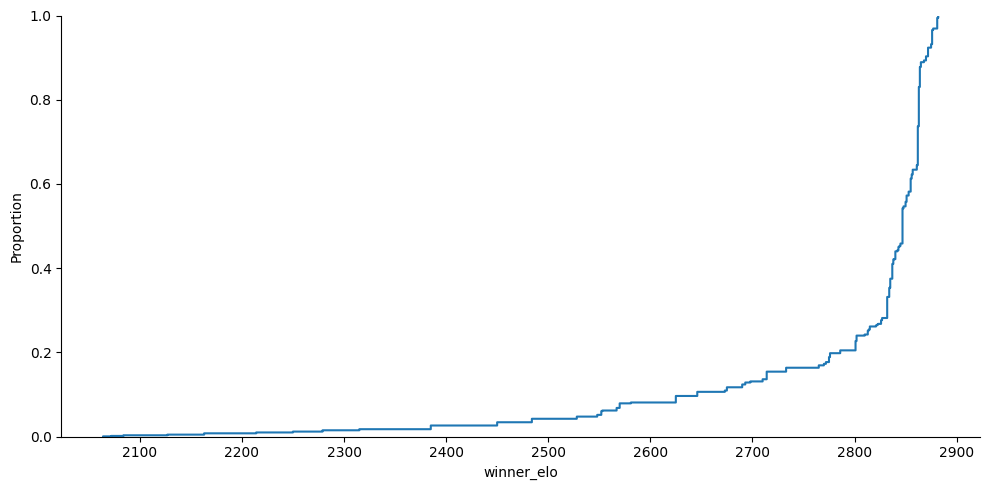

In [13]:
sns.displot(df[df.winner.str.contains("Carlsen")].winner_elo, kind = "ecdf", height = 5, aspect = 2)

plt.show()

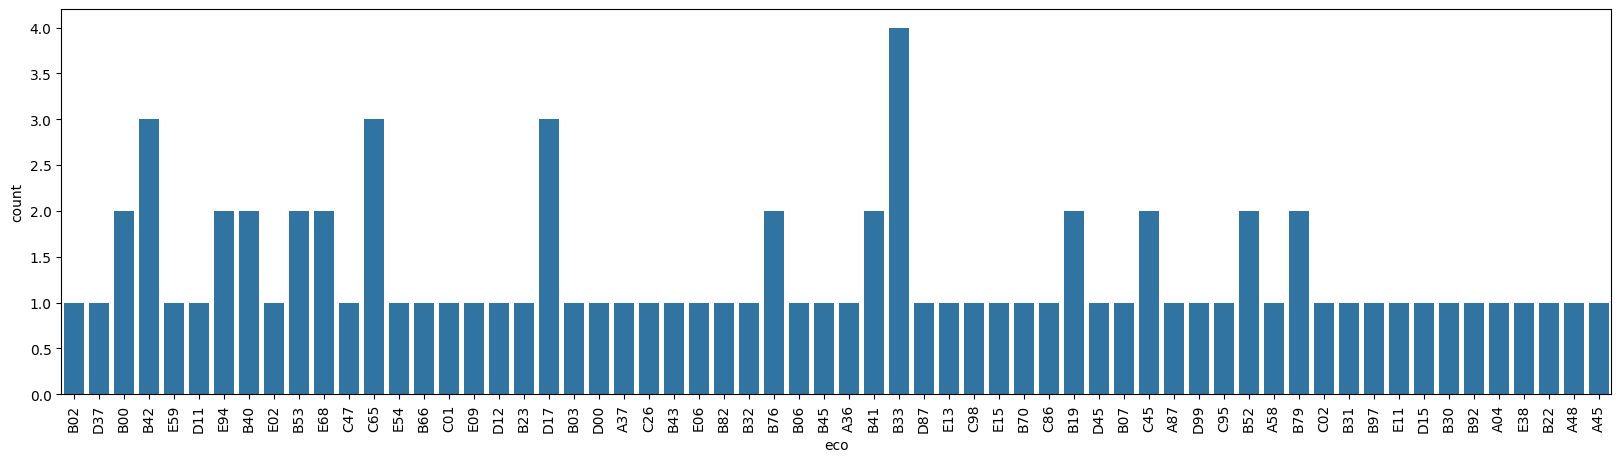

In [14]:
# variable catégorielle ou quantitative discrète

data = df[df.winner.str.contains("Carlsen") & (df.winner_elo.between(2000, 2500))]

fig = plt.figure(figsize = (20, 5))
ax  = sns.countplot(x = data.eco, data = data)

ax.set_xticks([i for i in range(0, len(data.eco.unique()))])
ax.set_xticklabels(labels = data.eco.unique(), rotation = 90) 

plt.show()

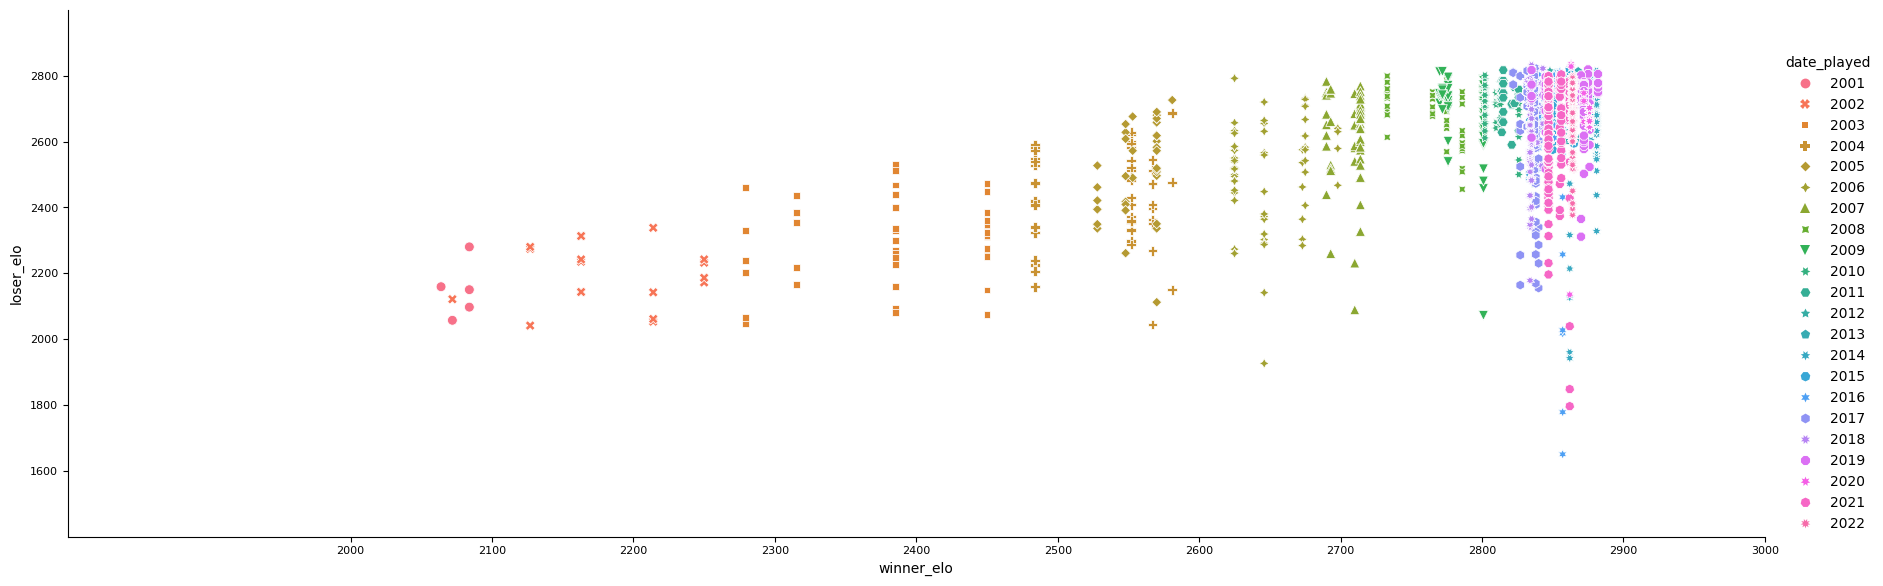

In [15]:
data = df[df.winner.str.contains("Carlsen")]
year = data.date_played.str[0:4]

g    = sns.relplot(x = "winner_elo", y = "loser_elo", data = data, height = 6, aspect = 3, style = year, hue = year, s = 50)
ax   = g.axes.flat[0]

ax.set_xlim(1800, 3000)
ax.set_ylim(1400, 3000)

ax.set_xticks(ticks = range(2000, 3100, 100)) # set new labels
ax.set_xticklabels(fontsize=8, labels = [i for i in range(2000, 3100, 100)])

ax.set_yticks(ticks = range(1600, 3000, 200)) # set new labels
ax.set_yticklabels(fontsize = 8 , labels = [i for i in range(1600, 3000, 200)])

plt.show ()


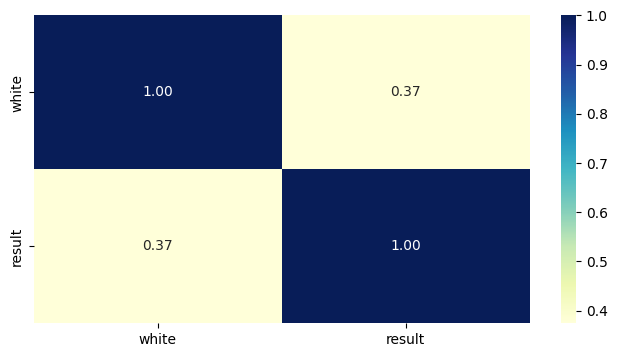

In [17]:
corr_df        = df.loc[:, ["white", "result"]]
corr_df.white  = corr_df.white.apply(lambda w : "1" if "Carlsen" in w else "-1")
corr_df.result = corr_df.result.apply(lambda w : "1" if "1-0" in w else "-1" if "0-1" in w else "0")
corr_df        = corr_df.astype({"white" : float, "result" : float})
corr_df        = corr_df.corr()

fig, ax = plt.subplots(figsize = (8, 4))

sns.heatmap(corr_df, annot = True, cmap = "YlGnBu", fmt = ".2f")

plt.show()